### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading dataset into DataFrame

In [2]:
adult = pd.read_csv("adult.csv")
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
rows = adult.shape[0]
cols = adult.shape[1]

print(f"The above Adult Dataset has \033[1m {rows} rows\033[0m and \033[1m{cols} columns \033[0m.")

The above Adult Dataset has  32561 rows and 15 columns .


### Info for Adult Dataset

In [4]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Finding missing values

In [5]:
missing_values = [[features,adult[features].isna().sum()] for features in adult.columns if adult[features].isna().sum() > 0]
missing_values

[]

### Observation

There are **N0** missing values.

### Duplicate Values

In [6]:
print(f"There are \033[1m {adult.duplicated().sum()}\033[0m duplicate rows.")

There are  24 duplicate rows.


### Dropping Duplicates

In [7]:
adult.drop_duplicates(inplace=True)

In [8]:
rows = adult.shape[0]
cols = adult.shape[1]

print(f"New shape of Adult Dataset has \033[1m {rows} rows\033[0m and \033[1m{cols} columns \033[0m.")

New shape of Adult Dataset has  32537 rows and 15 columns .


### Checking for '?'

In [9]:
adult.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

### Columns in Adult Dataset

In [10]:
no_of_cols = len(adult.columns)
print(f"There are \033[1m {no_of_cols} columns\033[0m in total. \n\nThey are as follows,")

for i in range(no_of_cols):
    print(f"Column_no {i+1} :\033[1m",adult.columns[i], "\033[0m")

There are  15 columns in total. 

They are as follows,
Column_no 1 : age 
Column_no 2 : workclass 
Column_no 3 : fnlwgt 
Column_no 4 : education 
Column_no 5 : education-num 
Column_no 6 : marital-status 
Column_no 7 : occupation 
Column_no 8 : relationship 
Column_no 9 : race 
Column_no 10 : sex 
Column_no 11 : capital-gain 
Column_no 12 : capital-loss 
Column_no 13 : hours-per-week 
Column_no 14 : country 
Column_no 15 : salary 


### Men Vs Women

In [11]:
no_of_men = adult.groupby('sex').size()[' Male']
no_of_women = adult.groupby('sex').size()[' Female']

print(f"There are \033[1m {no_of_men} Mens \033[0m and \033[1m {no_of_women} Womens \033[0m in the dataset.")

There are  21775 Mens  and  10762 Womens  in the dataset.


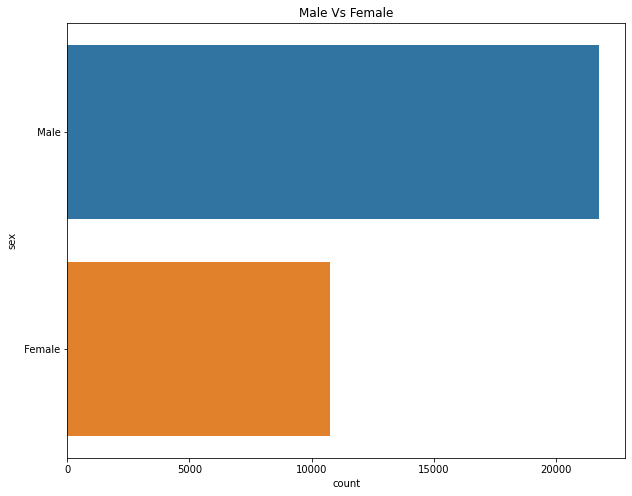

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(y='sex', data=adult)
plt.title("Male Vs Female")
plt.show()

### Less than or Greater than 50K

In [13]:
sal_greater = adult.groupby('salary').size()[' <=50K']
sal_less = adult.groupby('salary').size()[' >50K']

print(f"There are \033[1m {sal_greater} people more than 50K \033[0m and \033[1m {sal_less}  people less than 50K\033[0m.")

There are  24698 people more than 50K  and  7839  people less than 50K.


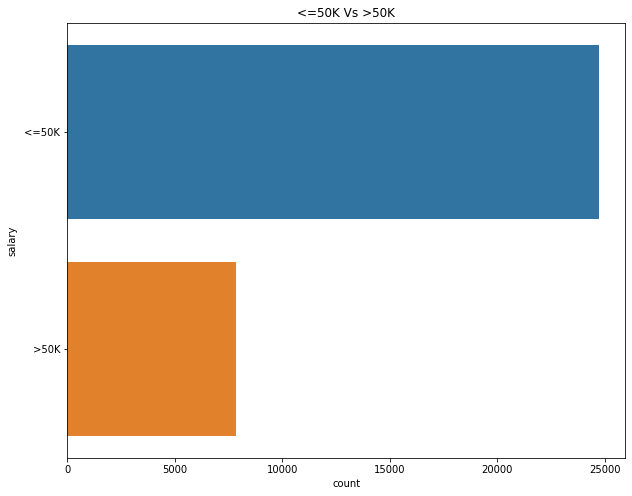

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(y='salary', data=adult)
plt.title("<=50K Vs >50K")
plt.show()

### Converting Categorical Columns into Numerical using Label Encoder

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

encode_columns = ['workclass','marital-status','occupation','relationship','race','sex','country','education']

for col in encode_columns:
    adult[col] = le.fit_transform(adult[col])

In [17]:
adult['salary'] = adult['salary'].map({" <=50K":0," >50K":1})

In [18]:
adult.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0
32560,52,5,287927,11,9,2,4,5,4,0,15024,0,40,39,1


### Correlation Heatmap

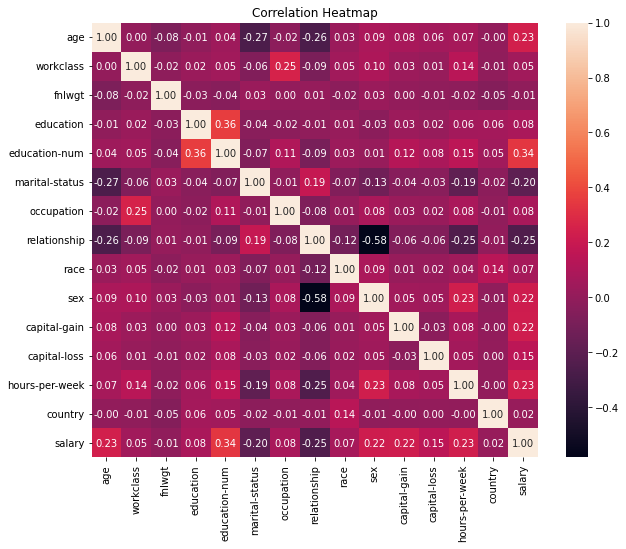

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(adult.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Correlation with Target Variable

In [20]:
adult.corr()['salary']

age               0.234037
workclass         0.051665
fnlwgt           -0.009502
education         0.079366
education-num     0.335272
marital-status   -0.199199
occupation        0.075419
relationship     -0.250948
race              0.071847
sex               0.215969
capital-gain      0.223336
capital-loss      0.150501
hours-per-week    0.229658
country           0.015618
salary            1.000000
Name: salary, dtype: float64

### Seprating Target Variable

In [21]:
X = adult.drop(['salary'],axis=1)
y = adult['salary'].values

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

X, y = smote.fit_resample(X,y)

### Dividing Data into Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0 )

### Scaling Features

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)

x_test = scaler.transform(x_test)

### Note

Here, scaling doesn't make any significant difference.

### Fitting Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
clf = RandomForestClassifier(oob_score=True, n_jobs=500,max_depth=90)

clf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=90, n_jobs=500, oob_score=True)

In [29]:
y_pred = clf.predict(x_test)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [31]:
score = accuracy_score(y_test, y_pred) * 100
print("Model Accuracy is \033[1m{0:.2f}%\033[0m ".format(score))

Model Accuracy is 89.79% 


In [32]:
cm = confusion_matrix(y_test, y_pred)
print("\033[1mConfusion Matrix:\033[0m\n",cm)

Confusion Matrix:
 [[5607  637]
 [ 624 5481]]


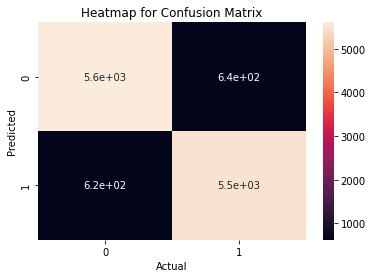

In [33]:
sns.heatmap(cm,annot=True)
plt.title("Heatmap for Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [34]:
print("\033[1mClassification Report\033[0m\n\n", classification_report(y_test, y_pred))

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.90      0.90      6244
           1       0.90      0.90      0.90      6105

    accuracy                           0.90     12349
   macro avg       0.90      0.90      0.90     12349
weighted avg       0.90      0.90      0.90     12349

